In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Genre':'Gender',
                   'Annual Income (k$)':'AnnualIncome',
                   'Spending Score (1-100)':'SpendingScore'},
                   inplace=True)

In [21]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,ClusterID
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,38.850000,60.560000,50.200000,0.98500
std,57.879185,13.969007,26.264721,25.823522,1.17545
min,1.000000,18.000000,15.000000,1.000000,0.00000
25%,50.750000,28.750000,41.500000,34.750000,0.00000
50%,100.500000,36.000000,61.500000,50.000000,0.00000
75%,150.250000,49.000000,78.000000,73.000000,2.00000
max,200.000000,70.000000,137.000000,99.000000,3.00000


In [22]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
ClusterID        0
dtype: int64

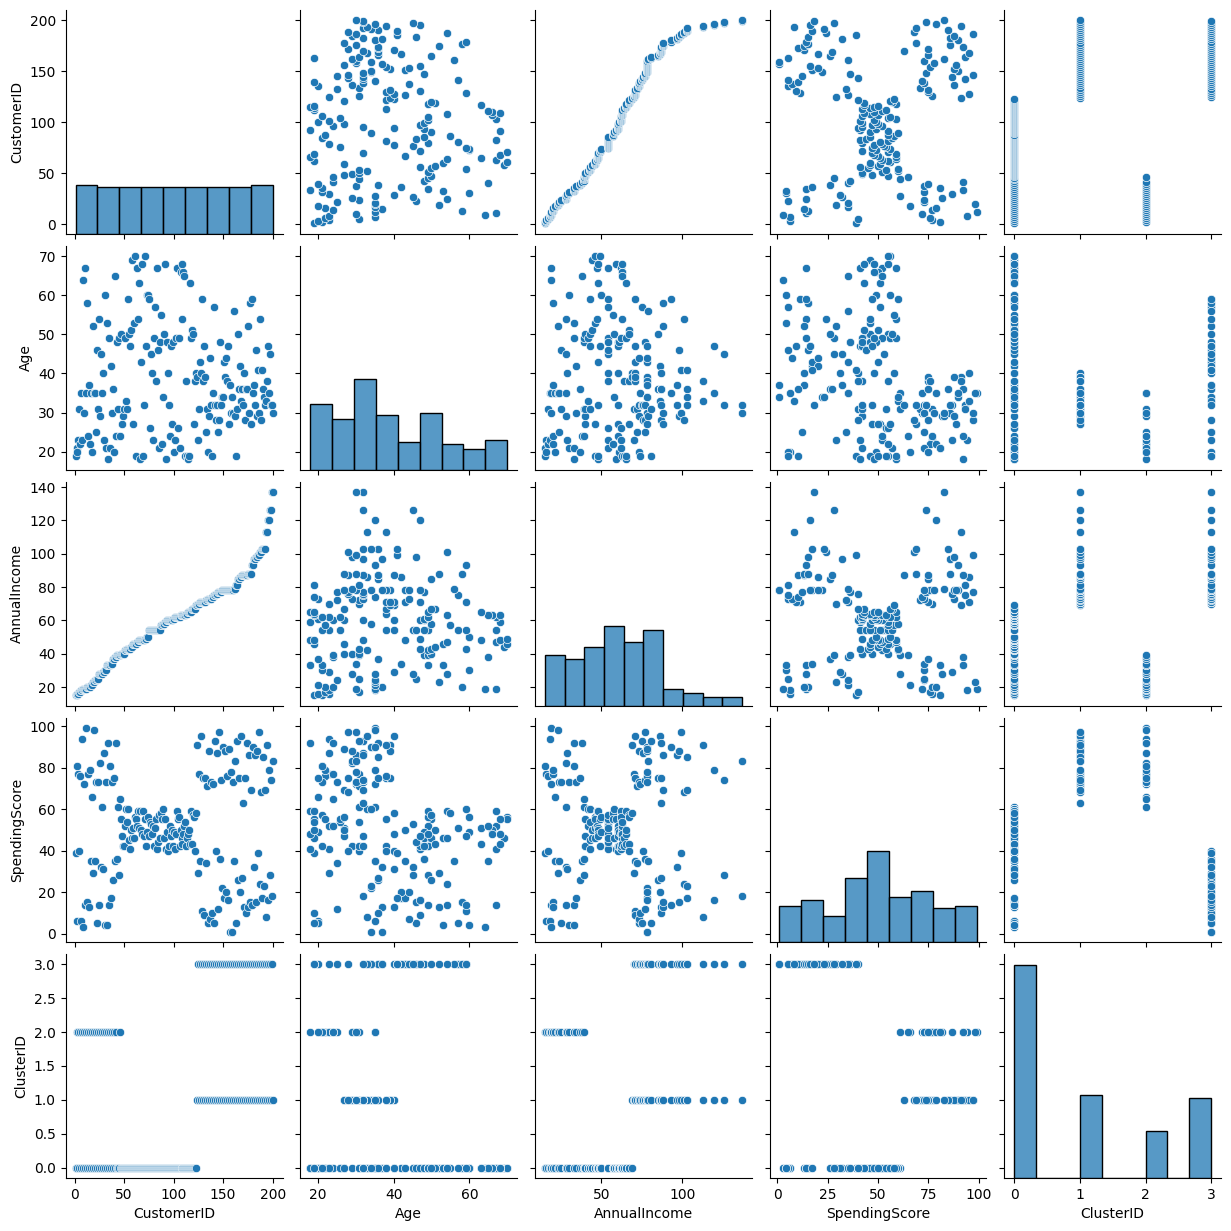

In [23]:
import seaborn as sns
sns.pairplot(df)

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['AnnualIncome','SpendingScore']]
X_scaled = StandardScaler().fit_transform(X)

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



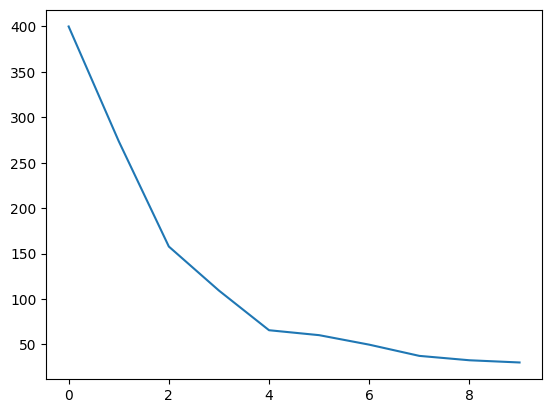

In [11]:
import matplotlib.pyplot as plt
plt.plot(inertia)

In [14]:
from sklearn.metrics import silhouette_score
#2,3,4
n = [2,3,4,5]
for k in n:
    kmeans = KMeans(n_clusters=k,random_state=42)
    print(silhouette_score(X_scaled,kmeans.fit_predict(X_scaled)))

0.3973270007887498
0.46658474419000145
0.49434988482196784
0.5546571631111091


In [15]:
kmeans = KMeans(n_clusters=4,random_state=42)
df['ClusterID'] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,ClusterID
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [18]:
df.groupby('ClusterID')['SpendingScore'].mean()

ClusterID
0    43.396040
1    82.128205
2    79.363636
3    18.631579
Name: SpendingScore, dtype: float64

In [ ]:
c_id = 1
if c_id == 3:
    print("No discount")
elif c_id == 1:
    print("15% discount")
elif c_id == 2:
    print("10% discount")
elif c_id == 0:
    print("8% discount")
else:
    print("New Customer 8% discount")
    

15% discount


In [20]:
df.to_csv("Cluster.csv")